In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/trip.csv')

In [4]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [5]:
################  Step 1.      1. 결측치 판단 및 처리
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [6]:
data.isna().mean() ## 몇 % 가 null

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [8]:
data [  data['fare_amount'].isna() ]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [9]:
#### 미미하므로, drop 
data.dropna( subset = ['fare_amount'])

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


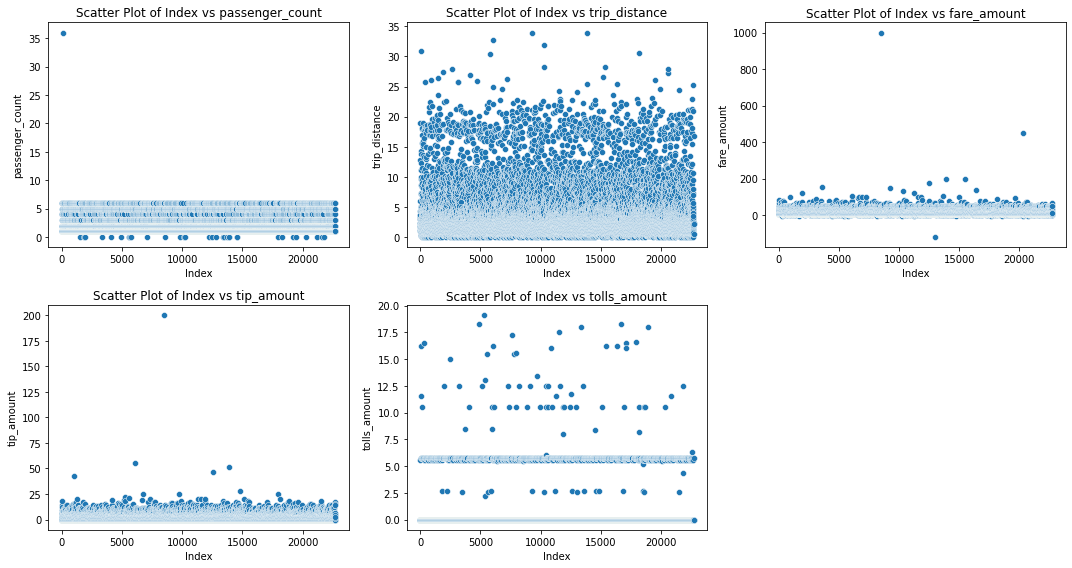

In [13]:
################  Step 1.      2. 이상치 판단 및 처리
## 숫자형 변수 각각에 대해, 데이터의 index와 변수 값 사이의 scatter plot을 그려보고 이상치가 관찰될 경우 제거

# 숫자형 변수 선택
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# scatter plot 생성
num_columns = len(numeric_columns)

# 서브플롯 크기 계산
nrows = (num_columns // 3) + (num_columns % 3 > 0)  # 3개씩 행으로 나누기
plt.figure(figsize=(15, nrows * 4))  # 플롯의 높이를 조절

for i, column in enumerate(numeric_columns):
    plt.subplot(nrows, 3, i + 1)  # 3개 열로 배열
    sns.scatterplot(x=data.index, y=data[column])
    plt.title(f'Scatter Plot of Index vs {column}')
    plt.xlabel('Index')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

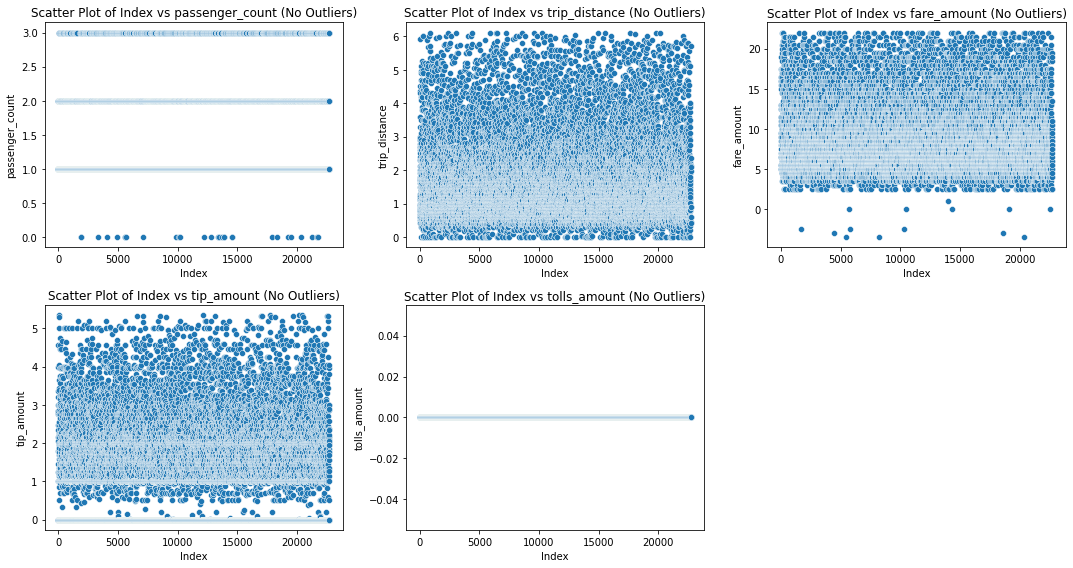

In [19]:
# IQR 기반 이상치 제거 함수 정의
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # 이상치 조건 정의
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 이상치를 제거
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# 이상치 제거 작업 수행
data_no_outliers = remove_outliers(data, numeric_columns)

# scatter plot 생성
num_columns = len(numeric_columns)
nrows = (num_columns // 3) + (num_columns % 3 > 0)  # 3개씩 행으로 나누기

plt.figure(figsize=(15, nrows * 4))  # 플롯의 높이를 조절

for i, column in enumerate(numeric_columns):
    plt.subplot(nrows, 3, i + 1)  # 3개 열로 배열
    sns.scatterplot(x=data_no_outliers.index, y=data_no_outliers[column])
    plt.title(f'Scatter Plot of Index vs {column} (No Outliers)')
    plt.xlabel('Index')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [20]:
data_no_outliers.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.0,1.78,0.0
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.0,0.00,0.0


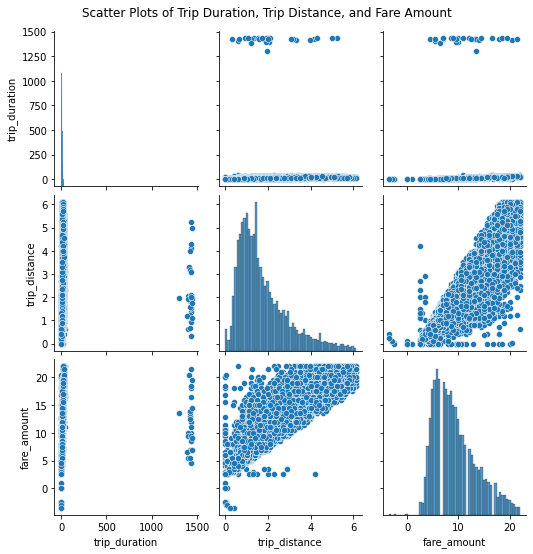

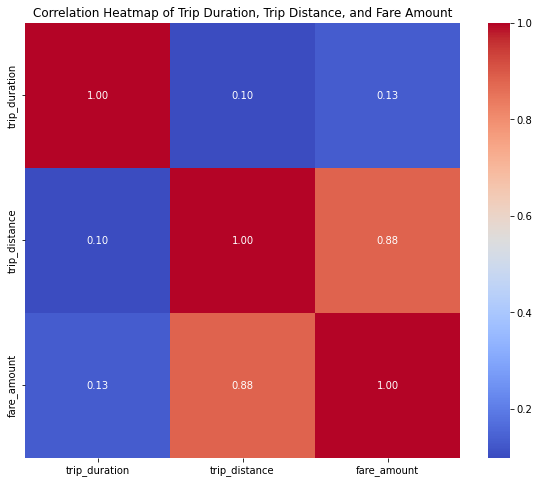

In [22]:
################  Step 2.      1. 택시 탑승 및 하차 시간 활용
# 'tpep_pickup_datetime'와 'tpep_dropoff_datetime'를 datetime 형식으로 변환
data_no_outliers['tpep_pickup_datetime'] = pd.to_datetime(data_no_outliers['tpep_pickup_datetime'])
data_no_outliers['tpep_dropoff_datetime'] = pd.to_datetime(data_no_outliers['tpep_dropoff_datetime'])

# 주행 시간 계산 (초 단위)
data_no_outliers['trip_duration'] = (data_no_outliers['tpep_dropoff_datetime'] - data_no_outliers['tpep_pickup_datetime']).dt.total_seconds() / 60  # 분 단위로 변환

# 필요 컬럼 선택
data_filtered = data_no_outliers[['trip_duration', 'trip_distance', 'fare_amount']].dropna()  # 결측값 제거


#### 여기부터는 .... .... ;;
# 산점도 행렬 (pairplot) 생성
sns.pairplot(data_filtered)
plt.suptitle('Scatter Plots of Trip Duration, Trip Distance, and Fare Amount', y=1.02)
plt.show()

# 상관 행렬 시각화
plt.figure(figsize=(10, 8))
correlation_matrix = data_filtered.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Trip Duration, Trip Distance, and Fare Amount')
plt.show()

In [25]:
### 2. Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 출력
data_no_outliers['payment_method'] = data_no_outliers['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})

# 결과 출력
data_no_outliers[['payment_method']].head()  # payment_method 컬럼의 앞부분 출력
data_no_outliers.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,7.200000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,16.716667
7,Hannah Foley,2017-08-15 17:41:06,2017-08-15 18:03:05,Card,1,2.98,16.0,1.78,0.0,21.983333
8,Katie Whitney,2017-02-04 16:17:07,2017-02-04 16:29:14,Cash,1,1.20,9.0,0.00,0.0,12.116667
